In [2]:
# Base libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# My model, metrics and preprocessing methods
from src.models.LogReg import *
from src.metrics import *

# Model and metrics from sklearn for comparison
import sklearn.linear_model as skl

In [3]:
# Upload DataFrame
df = pd.read_csv('src/data/Bank_Personal_Loan_Modelling.csv')
df

,Unnamed: 0,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
df.describe()

,Unnamed: 0,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2499.500000,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,0.000000,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1249.750000,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2499.500000,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3749.250000,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,4999.000000,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   ID                  5000 non-null   int64  
 2   Age                 5000 non-null   int64  
 3   Experience          5000 non-null   int64  
 4   Income              5000 non-null   int64  
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Personal Loan       5000 non-null   int64  
 11  Securities Account  5000 non-null   int64  
 12  CD Account          5000 non-null   int64  
 13  Online              5000 non-null   int64  
 14  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 586.1 KB


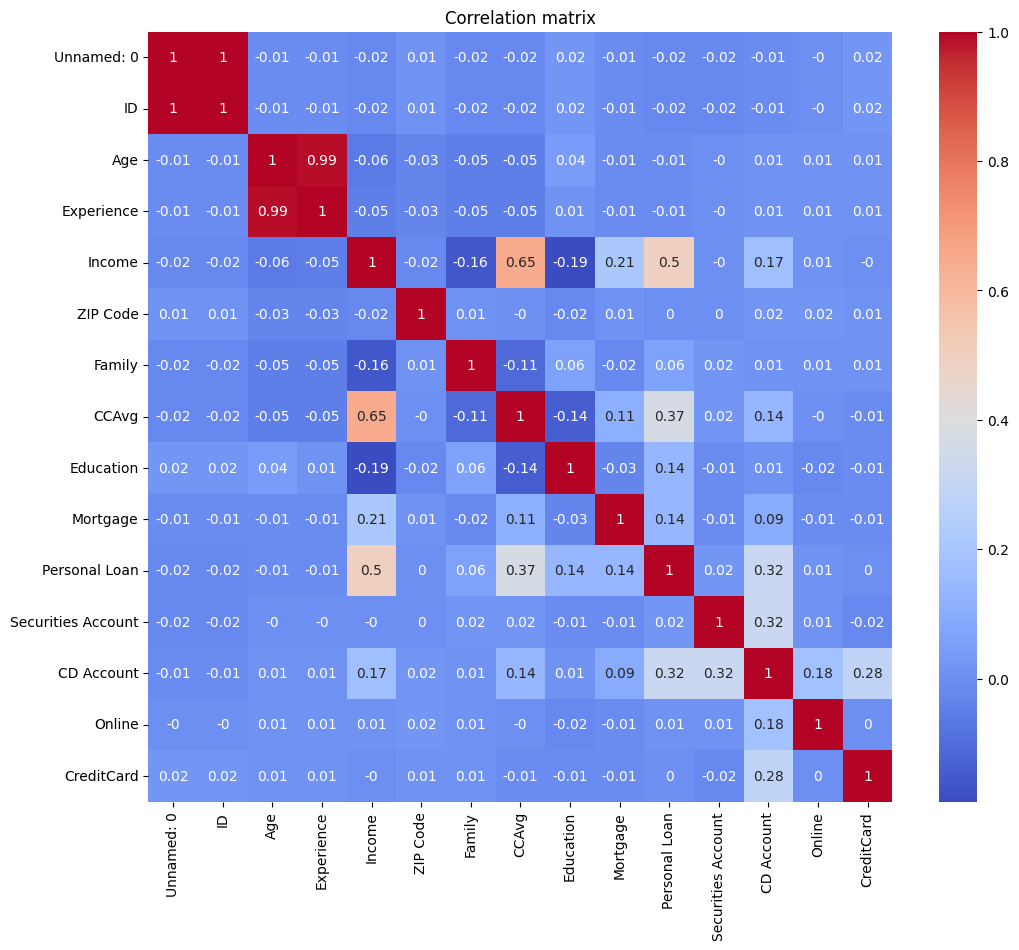

In [6]:
# Feature correlation matrix
plt.figure(figsize=(12, 10))
plt.title('Correlation matrix')
corr = np.round(df.corr(), 2)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

High correlation between "CCAvg" and "Income", "Income" and "Personal Loan"

In [7]:
X, y = df.drop(['Personal Loan', 'ZIP Code', 'Unnamed: 0', 'ID'], axis=1), df['Personal Loan']

In [8]:
# Normalize
from src.preprocessing import normalize
X['Age'] = normalize.min_max(X['Age'])
X['Experience'] = normalize.min_max(X['Experience'])
X['Income'] = normalize.min_max(X['Income'])

In [9]:
# Do one-hot-encoding
from src.preprocessing.one_hot import one_hot 
X = one_hot(X, ['CreditCard', 'Online', 'Securities Account', 'CD Account', 'Family'])
X

,Age,Experience,Income,CCAvg,Education,Mortgage,CreditCard_0,CreditCard_1,Online_0,Online_1,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Family_1,Family_2,Family_3,Family_4
0,0.045455,0.086957,0.189815,1.6,1,0,1,0,1,0,0,1,1,0,0,0,0,1
1,0.500000,0.478261,0.120370,1.5,1,0,1,0,1,0,0,1,1,0,0,0,1,0
2,0.363636,0.391304,0.013889,1.0,1,0,1,0,1,0,1,0,1,0,1,0,0,0
3,0.272727,0.260870,0.425926,2.7,2,0,1,0,1,0,1,0,1,0,1,0,0,0
4,0.272727,0.239130,0.171296,1.0,2,0,0,1,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.130435,0.148148,1.9,3,0,1,0,0,1,1,0,1,0,1,0,0,0
4996,0.159091,0.152174,0.032407,0.4,1,85,1,0,0,1,1,0,1,0,0,0,0,1
4997,0.909091,0.913043,0.074074,0.3,3,0,1,0,1,0,1,0,1,0,0,1,0,0
4998,0.954545,0.934783,0.189815,0.5,2,0,1,0,0,1,1,0,1,0,0,0,1,0


In [10]:
# Do train-test data split
from src.preprocessing.train_test_split import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, (0.8, 0.2))

In [ ]:
model = LogReg()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


c:\Users\Степан\Desktop\ModelsNoSklearn\src\models\LogReg.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / ( 1 + np.exp(-z))


In [12]:
acc = my_accuracy_score(y_test, y_pred)
pres = my_precision_score(y_test, y_pred)
rec = my_recall_score(y_test, y_pred)
f1 = my_f1_score(y_test, y_pred)
auc = ROC_AUC(y_test, y_pred)
print(acc, pres, rec, f1, auc)

0.91 0.6166666666666667 0.3557692307692308 0.45121951219512196 0.6604835594093407


In [13]:
model = skl.LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\Степан\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
acc = my_accuracy_score(y_test, y_pred)
pres = my_precision_score(y_test, y_pred)
rec = my_recall_score(y_test, y_pred)
f1 = my_f1_score(y_test, y_pred)
auc = ROC_AUC(y_test, y_pred)
print(acc, pres, rec, f1, auc)

0.948 0.90625 0.5576923076923077 0.6904761904761905 0.7736306662087912
